In [197]:
from pyexpat import features

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [198]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [199]:
wine.data.shape

(178, 13)

In [200]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [201]:
import pandas as pd

pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [202]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [203]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [204]:
xtrain, xtest, ytrain, ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [205]:
xtrain.shape

(124, 13)

In [206]:
xtest.shape

(54, 13)

In [207]:
ytrain.shape

(124,)

In [208]:
ytest.shape

(54,)

In [209]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)  #返回预测的准确度

In [210]:
score

0.8148148148148148

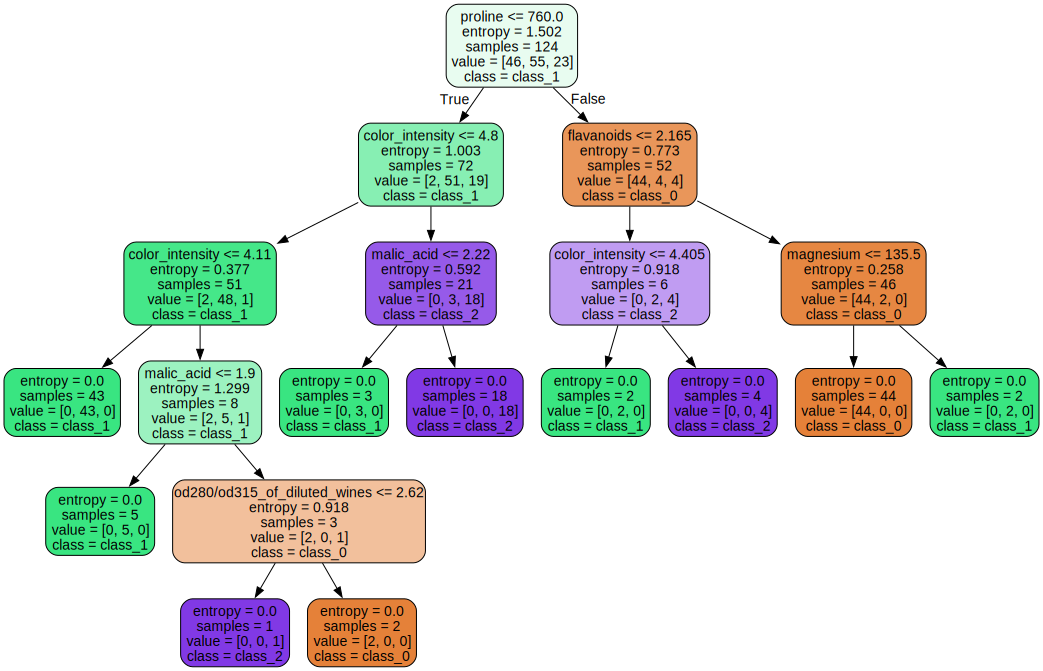

In [211]:
import graphviz

dot_data = tree.export_graphviz(clf
                                , feature_names=wine.feature_names
                                , class_names=wine.target_names
                                , filled=True
                                #filed 就是填充颜色。 越往下，不纯度越低，颜色越浅
                                , rounded=True)  #rounded 就是把框变成圆形

graph = graphviz.Source(dot_data)
graph

In [212]:
clf.feature_importances_

array([0.        , 0.1077254 , 0.        , 0.        , 0.06373576,
       0.        , 0.12259299, 0.        , 0.        , 0.29494488,
       0.        , 0.01479374, 0.39620723])

In [213]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', np.float64(0.0)),
 ('malic_acid', np.float64(0.1077253985623898)),
 ('ash', np.float64(0.0)),
 ('alcalinity_of_ash', np.float64(0.0)),
 ('magnesium', np.float64(0.06373575647963685)),
 ('total_phenols', np.float64(0.0)),
 ('flavanoids', np.float64(0.12259299177966092)),
 ('nonflavanoid_phenols', np.float64(0.0)),
 ('proanthocyanins', np.float64(0.0)),
 ('color_intensity', np.float64(0.2949448821715595)),
 ('hue', np.float64(0.0)),
 ('od280/od315_of_diluted_wines', np.float64(0.014793742392437961)),
 ('proline', np.float64(0.39620722861431495))]

	1.	创建决策树分类器：
	•	clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
	•	这里定义了一个决策树分类器对象 clf，使用 entropy 作为划分标准（信息熵）。random_state=30 用于保证随机过程的可重复性。
	2.	训练模型：
	•	clf = clf.fit(Xtrain, Ytrain)
	•	通过 fit 方法用训练数据 Xtrain 和 Ytrain 对模型进行训练。
	3.	评估模型：
	•	score = clf.score(Xtest, Ytest)
	•	使用 score 方法在测试集 Xtest 和 Ytest 上评估模型的准确性。score 方法返回模型在测试集上的准确度。
	4.	输出准确度：
	•	score
	•	直接输出模型的准确度。

In [214]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=40)
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)  # 返回预测的准确度

score

0.7777777777777778

添加random_state  和  splitter  控制决策树中的随机选项

In [215]:
from sklearn import tree
import graphviz

# 定义决策树分类器，使用信息熵作为划分标准，随机种子设为30，分割方式设为随机
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30, splitter="random")

# 训练模型
clf = clf.fit(xtrain, ytrain)

# 评估模型在测试集上的准确度
score = clf.score(xtest, ytest)
score  # 输出模型的准确度



0.8888888888888888

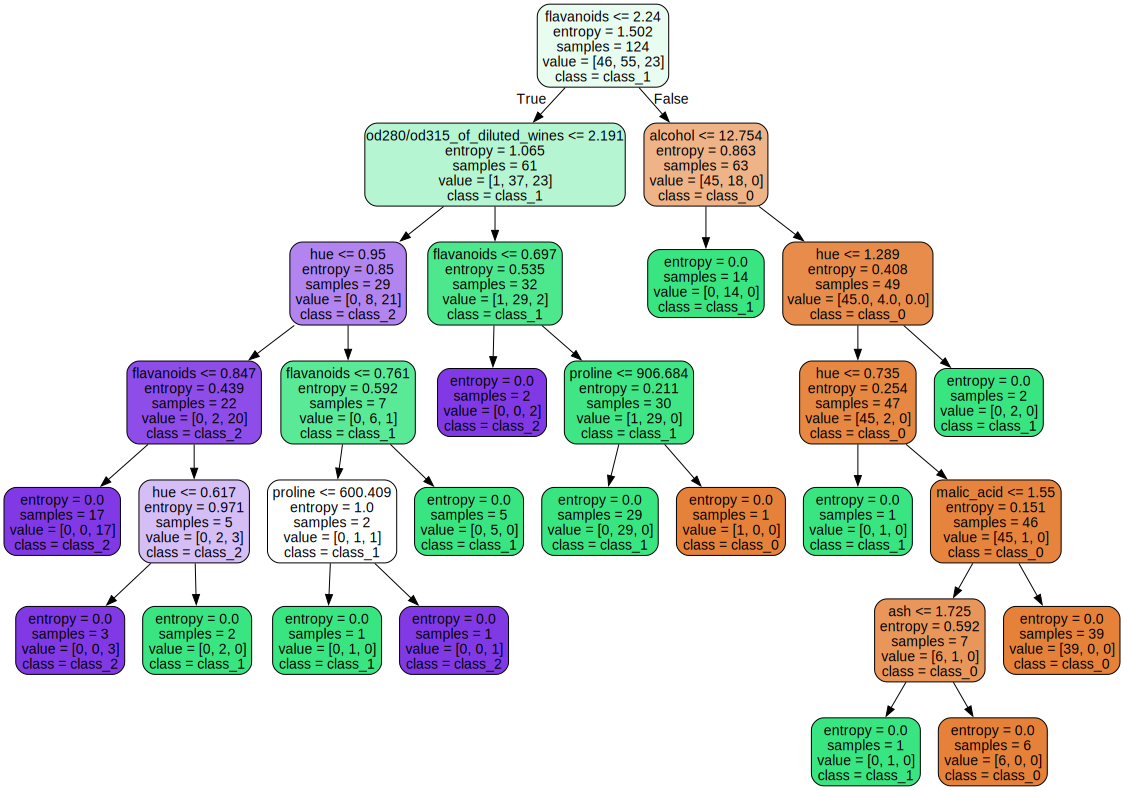

In [216]:
dot_data = tree.export_graphviz(clf
                                , feature_names=wine.feature_names
                                , class_names=wine.target_names
                                , filled=True
                                #filed 就是填充颜色。 越往下，不纯度越低，颜色越浅
                                , rounded=True)  #rounded 就是把框变成圆形

graph = graphviz.Source(dot_data)
graph

In [217]:
# 评估模型在训练集上的准确度
score = clf.score(xtrain, ytrain)
score  # 输出模型的准确度

1.0

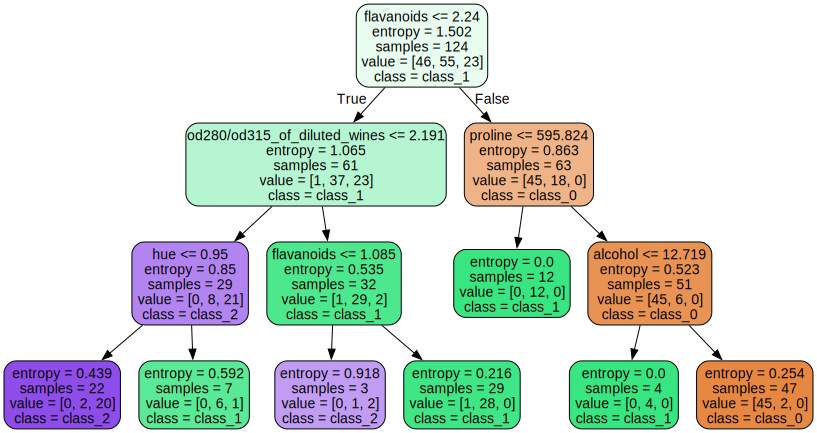

In [218]:
from sklearn import tree
import graphviz

# 定义决策树分类器，使用信息熵作为划分标准，随机种子设为30，分割方式设为随机
clf = tree.DecisionTreeClassifier(
                                    criterion="entropy",
                                    random_state=30,
                                    splitter="random",
                                    max_depth=3,  #设置最大限度为3
                                    # min_samples_leaf=10,
                                    # min_samples_split=10
                                )

# 训练模型
clf = clf.fit(xtrain, ytrain)

# 使用 graphviz 可视化决策树
dot_data = tree.export_graphviz(
    clf,
    feature_names=wine.feature_names,  # 特征名称列表
    class_names=wine.target_names,  # 类别名称列表
    filled=True,  # 填充颜色
    rounded=True  # 使用圆角框
)

# 生成并显示决策树图像
graph = graphviz.Source(dot_data)
graph

In [219]:
# 评估模型在测试集上的准确度
score = clf.score(xtest, ytest)
score  # 输出模型的准确度   # 修剪过，准确度更高 #但我自己测试 # min_samples_leaf=10, 这两个在效果并不好，所以不使用
                                                        # min_samples_split=10

0.9814814814814815